# TensorFlow for Artificial Intelligence

- Initial steps
- Basics
- The Computation Graph   
- Activation Functions
- Initialization 
- Optimization
- Feature Overview
- TensorBoard
- TensorFlow Serving
- TFLearn
- Distributed TensorFlow 
- TensorFlow on Android 
- Solving PDE’s
- Other worked examples
- Future Roadmap 
- Keras Integration

### Preamble
This chapter gives you an overview of TensorFlow's basics, capabilities, and ecosystem. We start with a brief history behind the development of TensorFlow to set the context.

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.4.0'

In [15]:
# TODO: does this initialize variables?
sess = tf.InteractiveSession()

In [14]:
a = tf.constant(0)
with tf.Session() as sess:
    sess.run(a)
    print(a)
    print(a.dtype)
    print(a.shape)
    print(a.get_shape())
    print(a.graph)
    print(a.device)
    print(a.eval())

Tensor("Const_12:0", shape=(), dtype=int32)
<dtype: 'int32'>
()
()

0


In [16]:
b = tf.constant(1)

In [27]:
c = a + b
c.eval()

1

In [26]:
with tf.Session() as sess:
    c = sess.run(a + b)
    print(c)

1


In [29]:
d = tf.multiply(a, b)
d

<tf.Tensor 'Mul:0' shape=() dtype=int32>

In [30]:
d.eval()

0

In [33]:
x = tf.random_uniform(
                                 [10, 3],
                                 minval=0,
                                 maxval=100,
                                 dtype=tf.int32
                             )

In [34]:
x

<tf.Tensor 'random_uniform_1:0' shape=(10, 3) dtype=int32>

In [35]:
# variables
random_uniform = tf.Variable('random_int', initializer=x)

TypeError: __init__() got an unexpected keyword argument 'initializer'

In [38]:
random_int = tf.get_variable('random_int2', initializer=x)

# get_variable vs. Variable???
# get_variable_scope?

In [40]:
# ValueError: Variable random_int2 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined
random_int = tf.get_variable('random_int2', initializer=x)

ValueError: Variable random_int2 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-38-0808dd804b14>", line 1, in <module>
    random_int = tf.get_variable('random_int2', initializer=x)
  File "/Users/amir.ziai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Users/amir.ziai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):


In [43]:
x.eval()

array([[71, 17, 43],
       [90, 38, 11],
       [40, 64, 96],
       [71, 75,  4],
       [46,  5, 17],
       [42, 28, 45],
       [41, 90, 68],
       [56, 12, 74],
       [85, 74, 84],
       [49, 68, 75]], dtype=int32)

In [44]:
x1 = tf.random_uniform([10, 3], minval=0, maxval=100, dtype=tf.int32, seed=0)

In [54]:
tf.AUTO_REUSE = True

In [55]:
tf.AUTO_REUSE

True

In [52]:
random_int = tf.get_variable('random_int2', initializer=x1)

ValueError: Variable random_int2 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-38-0808dd804b14>", line 1, in <module>
    random_int = tf.get_variable('random_int2', initializer=x)
  File "/Users/amir.ziai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Users/amir.ziai/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):


In [56]:
# TODO: What is variable reusing?

In [57]:
# TODO: Is this always necessary?
tf.global_variables_initializer()

<tf.Operation 'init' type=NoOp>

In [67]:
x.eval()

array([[54, 87, 37],
       [75, 35, 92],
       [16, 72, 70],
       [ 3, 18, 49],
       [92, 98, 32],
       [42, 15, 43],
       [46, 45, 64],
       [27, 53, 62],
       [63,  9, 58],
       [18, 76, 10]], dtype=int32)

In [61]:
with tf.Session() as sess:
    tf.global_variables_initializer()
    sess.run(random_int)

FailedPreconditionError: Attempting to use uninitialized value random_int2
	 [[Node: _retval_random_int2_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](random_int2)]]

In [68]:
random_int_var_one_ex = tf.get_variable("random_int_var_one",
                                        initializer=tf.random_uniform([2, 3, 4],
                                        minval=0,
                                        maxval=10,
                                        dtype=tf.int32))

In [71]:
print(random_int_var_one_ex)

<tf.Variable 'random_int_var_one:0' shape=(2, 3, 4) dtype=int32_ref>


In [72]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(random_int_var_one_ex))

[[[5 5 1 7]
  [0 5 3 0]
  [3 1 7 2]]

 [[2 2 5 4]
  [0 4 6 6]
  [4 3 8 2]]]


In [73]:
random_int_var_one_ex.name

'random_int_var_one:0'

In [75]:
sess.run(tf.get_default_graph().get_tensor_by_name(random_int_var_one_ex.name))

array([[[5, 5, 1, 7],
        [0, 5, 3, 0],
        [3, 1, 7, 2]],

       [[2, 2, 5, 4],
        [0, 4, 6, 6],
        [4, 3, 8, 2]]], dtype=int32)

In [76]:
sess.close()

In [36]:
from graphviz import Digraph

def tf_to_dot(graph):
    dot = Digraph()

    for n in graph.as_graph_def().node:
        dot.node(n.name, label=n.name)

        for i in n.input:
            dot.edge(i, n.name)
            
    return dot

### Perceptron v1

In [177]:
import numpy as np

In [178]:
tf.reset_default_graph()

In [179]:
tf_to_dot(tf.get_default_graph())

Tensor("x:0", shape=(1, 2), dtype=float32)


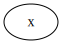

In [180]:
x = tf.placeholder(tf.float32, [1, 2], name='x')
print(x)
tf_to_dot(tf.get_default_graph())

Tensor("random_normal:0", shape=(1, 2), dtype=float32)


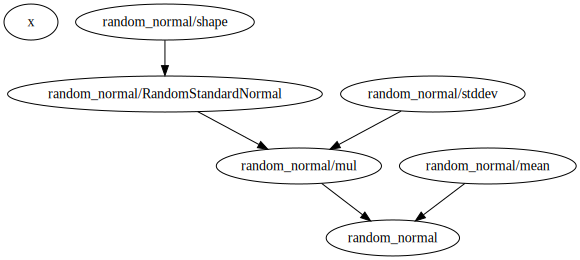

In [181]:
init = tf.random_normal([1, 2])
print(init)
tf_to_dot(tf.get_default_graph())

<tf.Variable 'w:0' shape=(1, 2) dtype=float32_ref>


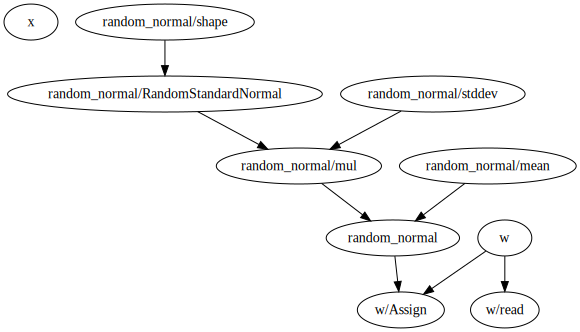

In [182]:
w = tf.Variable(init, name='w')
print(w)
tf_to_dot(tf.get_default_graph())

Tensor("mul:0", shape=(1, 2), dtype=float32)


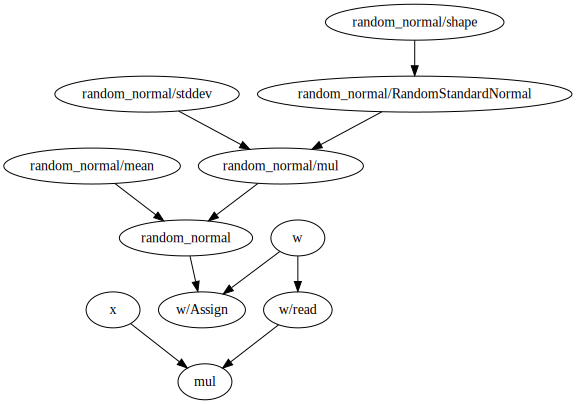

In [183]:
y = w * x
print(y)
tf_to_dot(tf.get_default_graph())

In [184]:
init = tf.global_variables_initializer()

In [185]:
with tf.Session() as sess:
    sess.run(init)
    w_current = sess.run(w)
    a = sess.run(y, feed_dict={x: np.array([[1, 2]])})
    print(w_current)
    print(a)

[[ 1.49550366 -0.65282011]]
[[ 1.49550366 -1.30564022]]


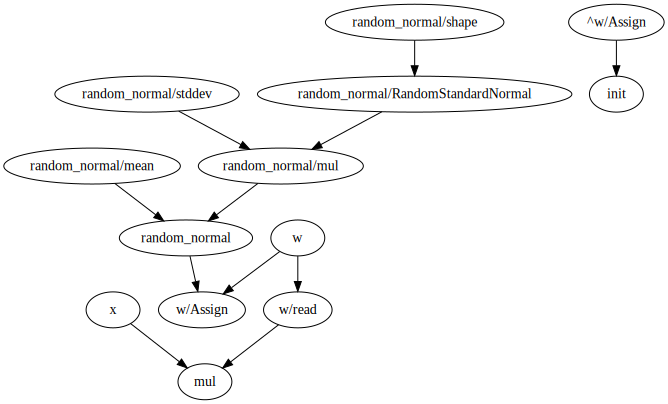

In [186]:
tf_to_dot(tf.get_default_graph())

### Perceptron v2
Random init is too complicated

In [198]:
tf.reset_default_graph()

In [199]:
tf_to_dot(tf.get_default_graph())

Tensor("x:0", shape=(1, 2), dtype=float32)


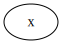

In [200]:
x = tf.placeholder(tf.float32, [1, 2], name='x')
print(x)
tf_to_dot(tf.get_default_graph())

<tf.Variable 'w:0' shape=(1, 2) dtype=float32_ref>


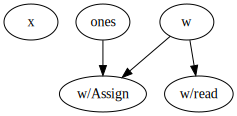

In [201]:
w = tf.Variable(tf.ones([1, 2]), name='w')
print(w)
tf_to_dot(tf.get_default_graph())

Tensor("mul:0", shape=(1, 2), dtype=float32)


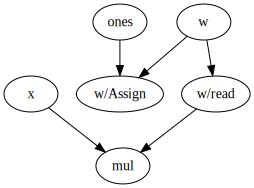

In [202]:
y = x * w
print(y)
tf_to_dot(tf.get_default_graph())

In [203]:
init = tf.global_variables_initializer()

In [205]:
with tf.Session() as sess:
    sess.run(init)
    w_current = sess.run(w)
    a = sess.run(y, feed_dict={x: np.array([[1, 2]])})
    print(w_current)
    print(a)

[[ 1.  1.]]
[[ 1.  2.]]


#### Training

In [213]:
tf.reset_default_graph()

In [214]:
w = tf.Variable(tf.ones([1, 2]), name='w')
delta = tf.constant(value=0.5, shape=[1, 2])

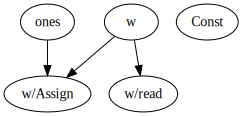

In [215]:
tf_to_dot(tf.get_default_graph())

In [216]:
w += delta

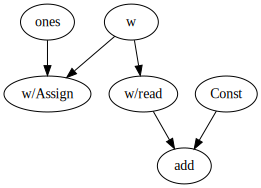

In [217]:
tf_to_dot(tf.get_default_graph())

In [218]:
init = tf.global_variables_initializer()

In [219]:
with tf.Session() as sess:
    sess.run(init)
    w_current = sess.run(w)
    print(w_current)

[[ 1.5  1.5]]


In [ ]:
# Graph construction
# Init
# Run

https://blog.jakuba.net/2017/05/30/tensorflow-visualization.html

### Possible approaches:
- Hacker way (try, fail, don't dive deep)
- Scientist way (learn abstractly, theory, comprehensive, understand)
- Somewhere in between, provide a bit of theory, show and tell, then wrap up with the big picture
- Somewhere in between, provide a sketch of the big picture, show and tell with minimal theory, wrap up reiterating the big picture

### TensorFlow
- why tf?
    - Amalgamation of features such as auto-diff, HW agnostic, optimization, 
    - Decided to do things using a computation graph (vs. what?)
        - Upside: 
        - Downside: 
    - 
- span of tasks
    - By computation:
        - Linear algebra (matrix factorization, tensor multiplication)
        - Backprop, NN
        - ...
    - By task:
        - Deep learning training and inference
        - PDE?
        - Search?
        - Matrix factorization
        - ...
- alternatives? refer to appendix A
- HW agnostic (refer to chapter 9)
- C++/Python interface
- Single and cluster mode (more about this later in this chapter)
- XLA/compiler/optimizations
- Community: latest papers, methods, architectures built + Google resources
- When is TF not the right tool?
- 

### Motivating example
- classify X, logistic regression, minimal ML jargon
- work through the code

### Tensors
- what are tensors
- examples

### The Computation Graph
- why use a graph?
- how to construct a graph
- nodes and edges
- operations
- sessions, graphs, run, fetch

### Wrappers
- TFLearn
- skflow
- keras